In [2]:
import cv2
import matplotlib.pyplot as plt

In [12]:
img = cv2.imread(r"c:\Users\naiti\Pictures\ChatGPT Image Jul 10, 2025, 10_26_13 AM.png")
cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
##pillow
from PIL import Image
img1 = Image.open(r"c:\Users\naiti\Pictures\ChatGPT Image Jul 10, 2025, 10_26_13 AM.png")
img1.show()
# img1.save("car.jpg")
print(img.shape)
print(img1.size)

import numpy as np
img1_array = np.array(img1)
print(img1_array.dtype)


(1024, 1536, 3)
(1536, 1024)
uint8


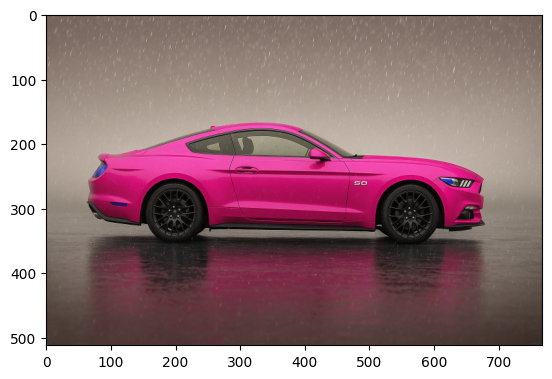

In [ ]:
##scaling = change the size of the image either enlaring or shrinking
###scaled = cv.resize(img(new_width,new_height)

# scaled_image = cv2.resize(img,(200, 200))
scaled_image = cv2.resize(img,(0,0),fx=0.5,fy=0.5)
##img = image
#0,0 = you are not making any changes to the width and height
#fx , fy = scaling factor

plt.imshow(scaled_image)

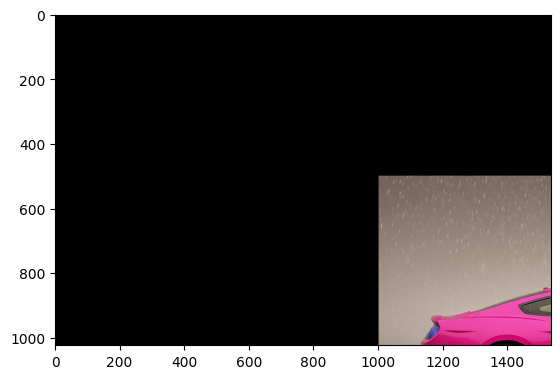

In [ ]:
# Translation = changes the location of an image on this screen 
import numpy as np
rows, cols = img.shape[:2]
tx , ty = 1000,500 #translation factor 
M = np.float32([[1,0,tx],[0,1,ty]])

translated_image = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(translated_image)

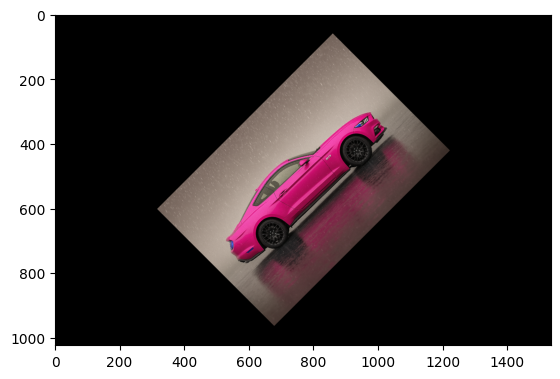

In [21]:
##Rotation
center = (cols//2,rows//2)
angle = 45
scale = 0.5
##scale = zoom in and zoom out
##1 == original image, <1 = zoom out, >1 = zoom in
M = cv2.getRotationMatrix2D(center,angle,scale)
#affline = rotation, scaling, translation

rotated_image = cv2.warpAffine(img,M,(cols,rows))
plt.imshow(rotated_image)

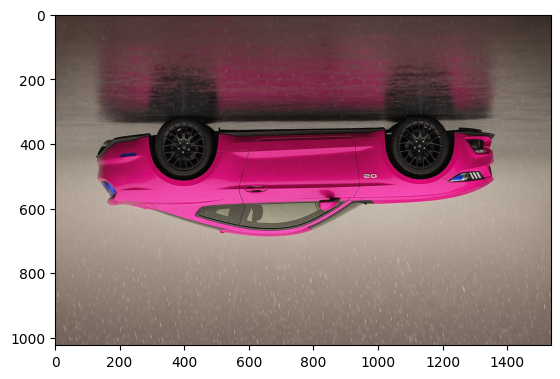

In [22]:
##Flipping
flip_image = cv2.flip(img,0)
#0 = horizontal, 1 = vertical, -1 = both
plt.imshow(flip_image)


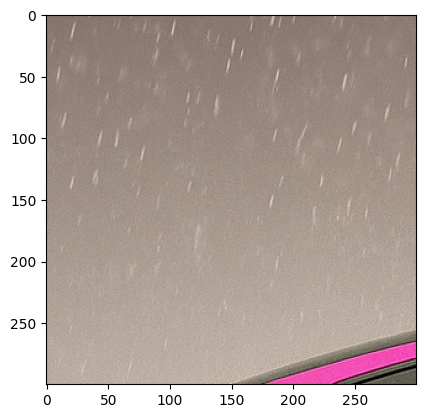

In [ ]:
##Cropping  ---- slicing an array 
cropped_image = img[100:400, 200:500] 
plt.imshow(cropped_image)


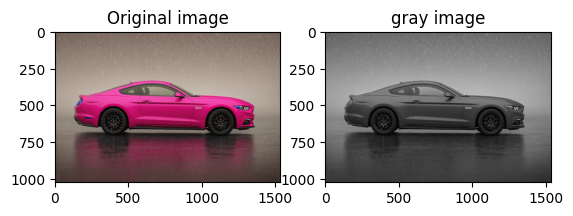

In [30]:
##RGB image to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  ##cvt = convert color  
plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original image")
plt.subplot(1,2,2)
plt.imshow(gray_image, cmap='gray')
plt.title("gray image")
plt.show()

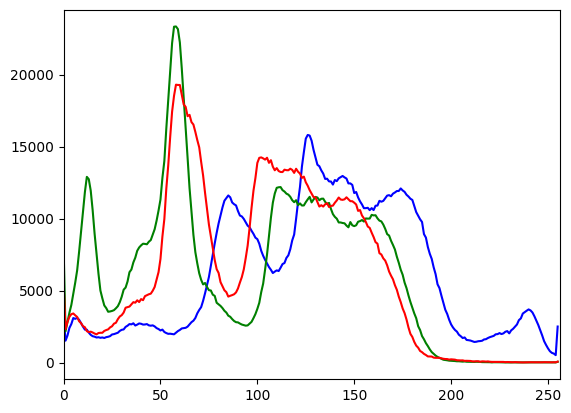

In [ ]:
##Histogram = distribution of pixel values in an image
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    # plt.subplot(1, 3, i + 1)
    # i = channel index (0 for blue, 1 for green, 2 for red)
    # none = mask (not used here)
    #256 = number of bins
    # [0, 256] = range of pixel values
    # img = input image
    hist = cv2.calcHist([img], [i], None, [256], [0, 256])
    plt.plot(hist, color=col)
    plt.xlim([0, 256])
plt.show()

In [34]:
#erosion = removes white pixels from the boundary of an object
#dilation = adds white pixels to the boundary of an object

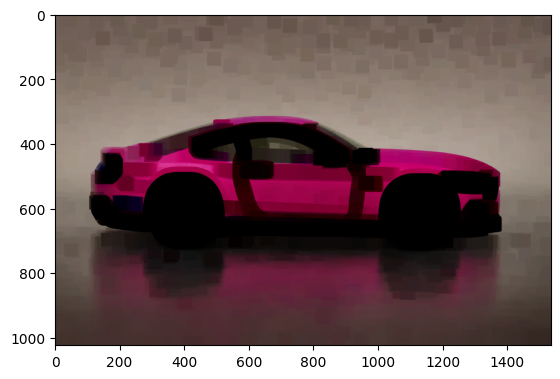

In [38]:
kernel = np.ones((5,5),np.uint8)  # 5x5 kernel of ones
erosion = cv2.erode(img,kernel,iterations=10)
dilate = cv2.dilate(img,kernel,iterations=10)
plt.imshow(erosion,cmap='gray')